## Compute State Probability 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Initialization of the transition matrix :
K=np.array([[0.6,0.4],[0.75,0.25]])
# Set the value for PI_0 
p_0 =np.array([0.5,0.5])
# Set the number of timesteps
timesteps=10

In [3]:

def DTMC_StateProba(t, P, pi_0):
    """
    Calculate the state probabilities of a Discrete-Time Markov Chain (DTMC) after 't' time steps.

    Parameters:
    t (int): The number of time steps to simulate.
    P (numpy.ndarray): The transition matrix of the DTMC.
    pi_0 (numpy.ndarray): The initial state probability vector.

    Returns:
    numpy.ndarray: An array containing state probabilities at each time step.
    """
    # pi_t is equal to pi_0 multiplied by the t step transition matrix
    nth_P = P
    # Create an array that will contain state probabilities and initialize it to pi_0.
    pi_t = [pi_0]
    # Loop t times to calculate the state probabilities at each time step.
    for i in range(t):
        # Calculate the state probabilities at the next time step.
        pi_t.append(np.matmul(pi_0, nth_P))
        # Update the transition matrix to the next power.
        nth_P = np.matmul(nth_P, P)
    # Return the state probabilities.
    return np.array(pi_t)


In [28]:
# Call the function and store the results in a variable.
DTMC_StateProba(timesteps,K,p_0)

array([[0.5       , 0.5       ],
       [0.675     , 0.325     ],
       [0.64875   , 0.35125   ],
       [0.6526875 , 0.3473125 ],
       [0.65209688, 0.34790312],
       [0.65218547, 0.34781453],
       [0.65217218, 0.34782782],
       [0.65217417, 0.34782583],
       [0.65217387, 0.34782613],
       [0.65217392, 0.34782608],
       [0.65217391, 0.34782609]])

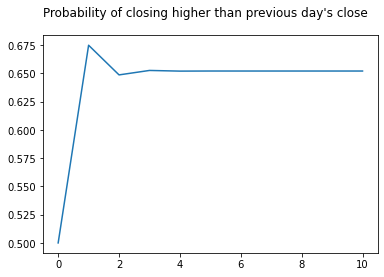

In [7]:
# plot pi_1t = P(X_t = +1) versus t
fig = plt.figure()
fig.suptitle('Probability of closing higher than previous day\'s close')
plt.plot(range(len(PT)),PT[:,0])
plt.show()

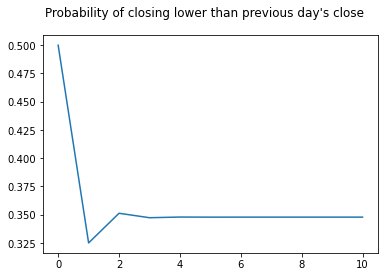

In [8]:
# plot pi_1t = P(X_t = +1) versus t
fig = plt.figure()
fig.suptitle('Probability of closing lower than previous day\'s close')
plt.plot(range(len(PT)),PT[:,1])
plt.show()

# Simulation of DTMC :
##### Simulate a realization of a DTMC in 365 days

In [22]:
# Pick the number of the states we want to generate
TimeSteps = 365
# Choose the closing stock price to be 315 $
closing_price=100
# Intitialize state proba
p_0 =np.array([0.5,0.5])
# Insert a transition Matrix
K=np.array([[0.6,0.4],[0.75,0.25]])

In [25]:

def simulation_DTMC(Steps, closing_price, initial_state_probability, transition_matrix):
    """
    Simulate a Discrete-Time Markov Chain (DTMC) for a given number of steps.

    Parameters:
    Steps (int): The number of time steps to simulate.
    closing_price (float): The initial closing price.
    initial_state_probability (numpy.ndarray): The initial state probability vector.
    transition_matrix (numpy.ndarray): The transition matrix of the DTMC.

    Returns:
    numpy.ndarray: An array containing simulated closing prices at each time step.
    """
    closing_prices = [closing_price]
    for i in range(1, Steps + 1):
        # Simulate a Uniform random variable at each time step
        U = np.random.rand(0, 1)
        pi_t = DTMC_StateProba(i, transition_matrix, initial_state_probability)
        # Choose the percentage delta of change in closing price upon increase or decrease
        delta = np.random.rand() * 2
        if pi_t[i][0] >= U:
            closing_price_t = closing_price * (100 + delta) / 100
        else:
            closing_price_t = closing_price * (100 - delta) / 100
        closing_prices.append(closing_price_t)
    return np.array(closing_prices)


In [26]:
# Call the function and store the results in a variable.
simulation_DTMC(TimeSteps ,closing_price,p_0,K)

<ipython-input-25-218ddefe6df1>:9: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if   pi_t[i][0] >= U:


array([100.        ,  98.58517939,  99.28984014,  99.90156016,
        99.35620918,  99.51079595,  99.18443041,  98.13780482,
        98.99586956,  99.5898667 ,  99.18503613,  98.01350935,
        98.39414263,  99.5717229 ,  98.02447369,  99.55575556,
        99.68939031,  99.70629446,  99.43559996,  98.4683708 ,
        98.57827086,  98.22897751,  98.43460051,  99.76819977,
        99.12121297,  98.10833572,  99.90681488,  99.171984  ,
        99.46387667,  98.5977041 ,  98.43648072,  99.85083436,
        98.99024871,  98.09153441,  98.04524638,  98.27591069,
        99.13652015,  99.39644198,  99.08827283,  98.2873207 ,
        98.59043113,  98.33341268,  98.98572996,  99.06018267,
        98.28557777,  98.28361272,  99.87101146,  99.85427517,
        98.63437938,  98.01668508,  99.84745761,  99.7358575 ,
        98.56761279,  99.51031068,  99.79700446,  98.12946357,
        99.96611094,  98.07170646,  99.9126987 ,  98.44792545,
        99.95207178,  98.58949011,  98.77796451,  99.56

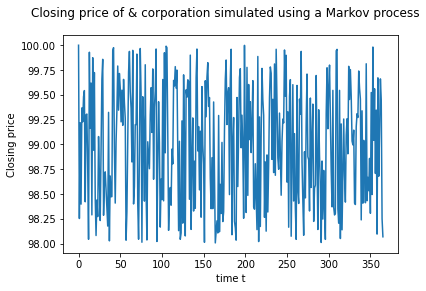

In [27]:
# Plot all the accumulated closing prices
fig = plt.figure()
fig.suptitle('Closing price of & corporation simulated using a Markov process')
plt.xlabel('time t')
plt.ylabel('Closing price')
plt.plot(range(TimeSteps+1), CP)
plt.show()
